In [42]:
import pandas as pd
import requests
import json
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [32]:
# Define parameters
start_ds = "2020-04-01T00:00:00Z"
end_ds = "2021-04-01T00:00:00Z"

In [33]:
# Call API

response = requests.get("https://api.covid19api.com/country/singapore/status/confirmed?from={}&to={}"
                        .format(start_ds, end_ds)
                       )

if response:
    print("Successful API response.")
else:
    print("Failed to call API")

Successful API response.


In [37]:
data = json.loads(response.text)
print("Number of days: ", len(data))

Number of days:  431


In [65]:
# Parse json data into dataframe for easy processing
df = pd.DataFrame(data)

# Format date column
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d")
# df['Date'] = df['Date'].dt.strftime("%Y-%m-%d")

# Sort df in ascending order
df.sort_values(by=['Date'], inplace=True)

df.head()

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
0,Singapore,SG,,,,1.35,103.82,0,confirmed,2020-01-22 00:00:00+00:00
1,Singapore,SG,,,,1.35,103.82,1,confirmed,2020-01-23 00:00:00+00:00
2,Singapore,SG,,,,1.35,103.82,3,confirmed,2020-01-24 00:00:00+00:00
3,Singapore,SG,,,,1.35,103.82,3,confirmed,2020-01-25 00:00:00+00:00
4,Singapore,SG,,,,1.35,103.82,4,confirmed,2020-01-26 00:00:00+00:00


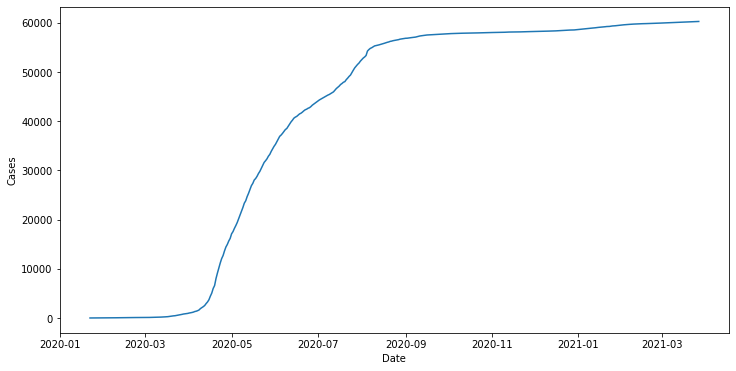

In [72]:
# Plot using Seaborn
fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.lineplot(data=df, x="Date", y="Cases", ax=ax)